/Users/tangxikai/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


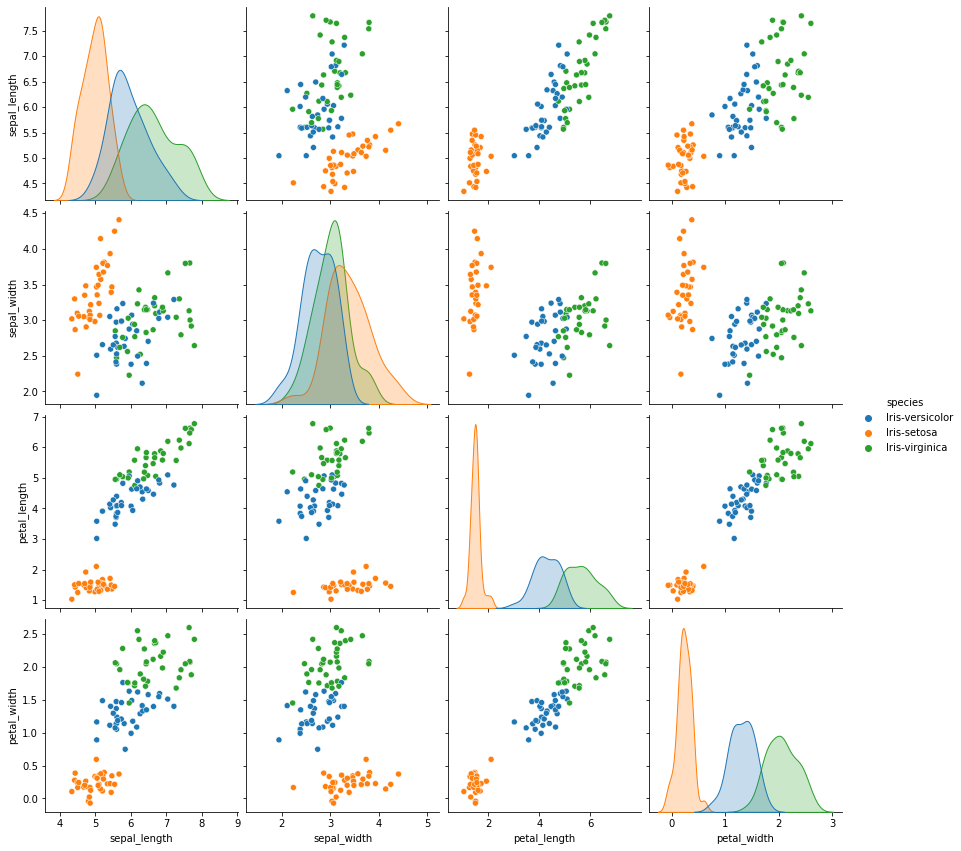

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris = pd.read_csv(r"/Users/tangxikai/Desktop/iris_dataset_missing.csv")
# 另一个有用的seaborn plot是pairplot，它显示了每一对特征之间的双变量关系
# 从pairplot中，我们可以看到Iris-setosa物种在所有特征组合中与另外两种都是分离的
sns.pairplot(iris, hue="species", size=3)

In [2]:
iris.corr()
#协方差Covariance

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.031792,0.880635,0.809915
sepal_width,-0.031792,1.000000,-0.285793,-0.267574
petal_length,0.880635,-0.285793,1.000000,0.958274
petal_width,0.809915,-0.267574,0.958274,1.000000


In [3]:
print(iris.mean())
#mean

sepal_length    5.858909
sepal_width     3.059083
petal_length    3.812370
petal_width     1.199708
dtype: float64


In [4]:
print(iris.max())

sepal_length           7.79556
sepal_width            4.40956
petal_length           6.76861
petal_width            2.60312
species         Iris-virginica
dtype: object


In [5]:
print(iris.min())

sepal_length        4.34401
sepal_width         1.94601
petal_length        1.03303
petal_width      -0.0722026
species         Iris-setosa
dtype: object


In [6]:
print(iris.std())

sepal_length    0.861638
sepal_width     0.455116
petal_length    1.793489
petal_width     0.787193
dtype: float64


In [7]:
print(iris.skew())
#skew偏度

sepal_length    0.401506
sepal_width     0.367708
petal_length   -0.255767
petal_width    -0.074751
dtype: float64


In [8]:
iris.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
100,False,False,False,False,False
101,False,False,False,False,False
102,False,False,False,False,False
103,False,False,False,False,False


In [9]:
new_iris = iris.dropna()
print (new_iris)
#delet null 

     sepal_length  sepal_width  petal_length  petal_width          species
0        5.045070     2.508203      3.018024     1.164924  Iris-versicolor
1        6.325517     2.115481      4.542052     1.413651  Iris-versicolor
2        5.257497     3.814303      1.470660     0.395348      Iris-setosa
3        6.675168     3.201700      5.785461     2.362764   Iris-virginica
4        5.595237     2.678166      4.077750     1.369266  Iris-versicolor
..            ...          ...           ...          ...              ...
100      4.874848     3.217348      1.592887     0.123588      Iris-setosa
101      5.564197     2.771731      3.483588     1.074754  Iris-versicolor
102      5.548047     4.249211      1.453466     0.214527      Iris-setosa
103      5.510482     2.652867      4.276817     1.298032  Iris-versicolor
104      4.538713     3.056142      1.545136     0.241424      Iris-setosa

[93 rows x 5 columns]


In [11]:
print (type (new_iris))

<class 'pandas.core.frame.DataFrame'>


In [10]:
#Q2

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
# 训练集，验证集和测试集（60％，20％，20％）
new_iris_feature = new_iris.iloc[:,0:4]
new_iris_target = new_iris.iloc[:,4:5]

dict = {"Iris-versicolor":0, "Iris-setosa":1, "Iris-virginica":2} 
new_iris_target['species'] = new_iris_target['species'].replace(dict)
print(new_iris_target)

X_trainval,X_test,y_trainval,y_test= train_test_split(new_iris_feature,new_iris_target,test_size=0.2,random_state=275)
X_train,X_val,y_train,y_val= train_test_split(X_trainval,y_trainval,test_size=0.25,random_state=275)

     species
0          0
1          0
2          1
3          2
4          0
..       ...
100        1
101        0
102        1
103        0
104        1

[93 rows x 1 columns]


<ipython-input-12-297f160265b8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_iris_target['species'] = new_iris_target['species'].replace(dict)


In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() # 创建一个KNN算法实例
knn.fit(X_train, y_train) # 将测试集送入算法
y_predict = knn.predict(X_test) # 获取预测结果
print (y_test,"\n", y_predict)

     species
8          1
84         1
26         1
60         0
16         1
83         2
80         1
36         0
33         0
89         1
53         2
61         0
67         1
3          2
40         2
18         2
25         1
100        1
48         0 
 [1 1 1 0 1 2 1 0 0 1 2 0 1 2 2 2 1 1 0]


<ipython-input-13-758d32bae483>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train) # 将测试集送入算法


In [14]:
#K=5
knn = KNeighborsClassifier(n_neighbors=5) # 创建一个KNN算法实例，n_neighbors默认为5,后续通过网格搜索获取最优参数
knn.fit(X_train, y_train) # 将测试集送入算法
y_predict = knn.predict(X_test) # 获取预测结果
print (y_test,"\n", y_predict)

     species
8          1
84         1
26         1
60         0
16         1
83         2
80         1
36         0
33         0
89         1
53         2
61         0
67         1
3          2
40         2
18         2
25         1
100        1
48         0 
 [1 1 1 0 1 2 1 0 0 1 2 0 1 2 2 2 1 1 0]


<ipython-input-14-ce2ef8abd379>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train) # 将测试集送入算法


In [15]:
#accuracy
import numpy as np
from sklearn.metrics import accuracy_score

y_pred = y_predict
y_true = y_test
print(accuracy_score(y_true, y_pred))  # 0.9666
print(accuracy_score(y_true, y_pred, normalize=False))  # 29 一共29true

1.0
19


In [16]:
#Save accuracy
import numpy as np
from sklearn.metrics import accuracy_score

accuracy = []
k_value = ['1', '5', '10', '15', '20', '25', '30', '35']
for i in range (len(k_value)):
    knn = KNeighborsClassifier(n_neighbors=int(k_value[i])) # 创建一个KNN算法实例，n_neighbors默认为5,后续通过网格搜索获取最优参数
    knn.fit(X_train, y_train) # 将train集送入算法
    y_predict = knn.predict(X_val) # 获取预测结果
    accuracy.append(accuracy_score(y_val,y_predict))
print (accuracy)

[0.9473684210526315, 1.0, 1.0, 0.9473684210526315, 1.0, 1.0, 1.0, 1.0]


<ipython-input-16-9c69bfb945de>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train) # 将train集送入算法
<ipython-input-16-9c69bfb945de>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train) # 将train集送入算法
<ipython-input-16-9c69bfb945de>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train) # 将train集送入算法
<ipython-input-16-9c69bfb945de>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train) # 将train集送入算法
<ipython-input-16-9c69bfb945de>:9: DataConversionWarning: A column-v

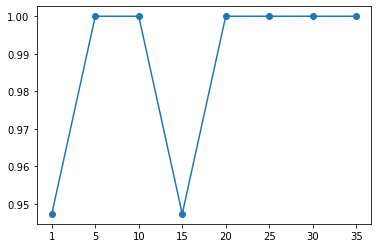

In [17]:
plt.plot(k_value, accuracy, 'o-')   # X轴：参数范围，Y轴：准确率，绘图类型（点+实线）
plt.show()

#AUC

In [18]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score

knn = KNeighborsClassifier(n_neighbors=5) # k=5 创建一个KNN算法实例，n_neighbors默认为5,后续通过网格搜索获取最优参数
knn.fit(X_train, y_train) # 将测试集送入算法
y_predict = knn.predict(X_test) # 获取预测结果
y_score = knn.predict_proba(X_test)

auc_score2 = roc_auc_score(y_test,y_score,multi_class='ovr')
print(auc_score2)


1.0


<ipython-input-18-4b4580bdf6e8>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train) # 将测试集送入算法


In [ ]:
2

#recall 灵敏度？召回

In [19]:
from sklearn.metrics import recall_score

y_pred = y_predict
y_true = y_test
print(recall_score(y_true, y_pred, average='macro'))  # 
print(recall_score(y_true, y_pred, average='micro'))  # 
print(recall_score(y_true, y_pred, average='weighted'))  # 
print(recall_score(y_true, y_pred, average=None))  # 

1.0
1.0
1.0
[1. 1. 1.]


F-score

In [20]:
from sklearn.metrics import f1_score

y_pred = y_predict
y_true = y_test
print(f1_score(y_true, y_pred, average='macro'))  # 0.26515151515151514
print(f1_score(y_true, y_pred, average='micro'))  # 0.26666666666666666
print(f1_score(y_true, y_pred, average='weighted'))  # 0.26590909090909093
print(f1_score(y_true, y_pred, average=None))  # [0.27272727 0.27272727 0.25      ]

1.0
1.0
1.0
[1. 1. 1.]


#Normalization max-min

[[0.34263048 0.1933282  0.47380081 0.45167581]
 [0.48914819 0.26753654 0.63428776 0.67309548]
 [0.07181383 0.33522578 0.02868369 0.06177234]
 [0.73321037 0.44634911 0.82360799 0.85494078]
 [0.05913526 0.55538291 0.05217161 0.0694451 ]
 [0.64627551 0.31547222 0.76353348 0.81287586]
 [1.         0.20538814 1.         0.93083118]
 [0.71134744 0.44741256 0.83859102 0.83084442]
 [0.17422078 0.62484556 0.0606983  0.06839601]
 [0.0082748  0.40974966 0.05281929 0.08546078]
 [0.22714788 0.78483695 0.03931449 0.14506612]
 [0.5137125  0.13266309 0.66153817 0.61977887]
 [0.30418318 0.21023643 0.54815922 0.49461965]
 [0.16599012 0.55761563 0.01887238 0.11112612]
 [0.18870191 0.41569755 0.03992914 0.05269779]
 [0.8440006  0.4020734  0.78210687 0.64300527]
 [0.3214833  0.30811504 0.66990005 0.79231052]
 [0.32999124 0.22275262 0.51206212 0.52220401]
 [0.27456397 0.40754413 0.52348508 0.42361061]
 [0.60369941 0.2352997  0.6039753  0.60432027]
 [0.43252409 0.39583452 0.67851174 0.67427278]
 [0.06837185 

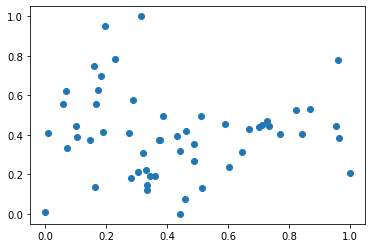

In [21]:
from sklearn.preprocessing import MinMaxScaler
#归一化(normalization)
minMax = MinMaxScaler()
x_std = minMax.fit_transform(X_train)
print(x_std)
plt.scatter(x_std[:,0],x_std[:,1])
plt.show()

#加权KNN 

In [21]:
import numpy as np
x=np.random.random((x_std[10])
y=np.random.random((x_std[10])
 
#根据scipy库求解
from scipy.spatial.distance import pdist
x_std=np.vstack([x,y])
d2=pdist(x_std)

SyntaxError: invalid syntax (<ipython-input-21-334acb3a1ac8>, line 3)